In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from mayavi import mlab
from CrystalStructures import *
mlab.init_notebook(backend='ipy')

Notebook initialized with ipy backend.


# Constrained MC

Text(0, 0.5, 'bond num')

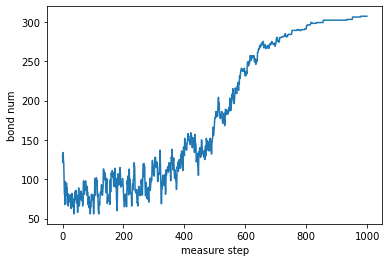

In [121]:
DataPath = "../data/Tetramantane_45/run0"
MolSize = 22
bondNum = np.fromfile(DataPath+"/bondNum.dat",dtype=np.int32)
plt.plot(bondNum)
plt.xlabel('measure step')
plt.ylabel('bond num')
# plt.title("Ada")
# plt.savefig("Ada100_bondNum.png", dpi=300);

In [122]:
step=1000
print(bondNum[step-1])
coords = np.fromfile(DataPath+"/step_"+str(step)+".dat",dtype=np.int32)
coords = np.reshape(coords,(-1,3),order="C")

compatible = np.fromfile(DataPath+"/step_"+str(step) + "_surface_comp.dat",dtype=np.int32)
compatible = np.reshape(compatible,(-1,3),order="C")
uncompatible = np.fromfile(DataPath+"/step_"+str(step) + "_surface_uncomp.dat",dtype=np.int32)
uncompatible = np.reshape(uncompatible,(-1,3),order="C")
vacancy = np.fromfile(DataPath+"/step_"+str(step) + "_vacancy.dat",dtype=np.int32)
vacancy = np.reshape(vacancy,(-1,3),order="C")

307


In [119]:
# compatible = np.fromfile(DataPath+"/surface_comp.dat",dtype=np.int32)
# compatible = np.reshape(compatible,(-1,3),order="C")
# uncompatible = np.fromfile(DataPath+"/surface_uncomp.dat",dtype=np.int32)
# uncompatible = np.reshape(uncompatible,(-1,3),order="C")
# vacancy = np.fromfile(DataPath+"/vacancy.dat",dtype=np.int32)
# vacancy = np.reshape(vacancy,(-1,3),order="C")

In [123]:
print("compatible:", compatible.shape[0])
print("uncompatible:",uncompatible.shape[0])
print("vacancy:",vacancy.shape[0])

compatible: 530
uncompatible: 116
vacancy: 20


In [120]:
[126/570, 115/511, 100/506, 4/180]

[0.22105263157894736,
 0.22504892367906065,
 0.1976284584980237,
 0.022222222222222223]

# 38
# 27
# 30
# 2

In [7]:
points3d(coords[0,0], color=(0,0,0))

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [115]:
mlab.clf()
colors = [[1, 0, 0],[0,1,0],[0,0,1],[1,1,0],[1,0,1],[0,1,1],[1,1,1],[0,0,0]]
MolNum = coords.shape[0]//MolSize
rmin = 0.9*np.sqrt(3)
rmax = 1.1*np.sqrt(3)
for m in range(MolNum):
    for n in range(MolSize):
        i=m*MolSize+n
        points3d(coords[i,0],coords[i,1],coords[i,2], resolution = 16, color = tuple(colors[m%8]), scale_factor=0.2)

count = 0
for i in range(coords.shape[0]):
    for j in range(i,coords.shape[0]):
        d = linalg.norm(coords[i]-coords[j])
        if d>rmin and d<rmax:
            count+=1
            num = 10
            x = np.linspace(coords[i,0],coords[j,0],num)
            y = np.linspace(coords[i,1],coords[j,1],num)
            z = np.linspace(coords[i,2],coords[j,2],num)
            mlab.plot3d(x,y,z,color=(0,0,0))

In [116]:
for r in vacancy[:]:
    points3d(r[0], r[1], r[2], resolution = 16, color = (1,0,0), scale_factor=0.7)

In [30]:
for r in compatible[:]:
    points3d(r[0], r[1], r[2], resolution = 16, color = (1,1,1), scale_factor=0.5)
for r in uncompatible[:]:
    points3d(r[0], r[1], r[2], resolution = 16, color = (1,0,0), scale_factor=0.5)

In [96]:
molNums = [8,16,32,64,128,256,512]
ave_coord_num = []
for molNum in molNums:
    DataPath = "data/Adamantane_"+str(molNum)
    bondNum = np.fromfile(DataPath+"/bondNum.dat",dtype=np.int32)
    bnum = max(bondNum)
    ave_coord_num.append(1.2+bnum/molNum/10)

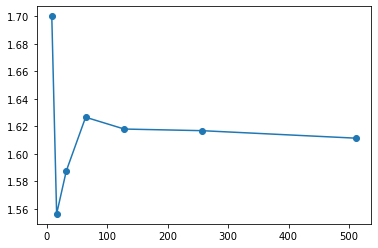

In [98]:
plt.plot(molNums,ave_coord_num,'o-')

# Molecular Dynamics

In [81]:
DataPath = "data/AdamantaneCoords_2.dat"
ETK = np.fromfile(DataPath+'/ETK',dtype=np.float64)
ERK = np.fromfile(DataPath+'/ERK',dtype=np.float64)
EV = np.fromfile(DataPath+'/EV',dtype=np.float64)
ETOT = ETK + ERK + EV

Text(0, 0.5, 'E')

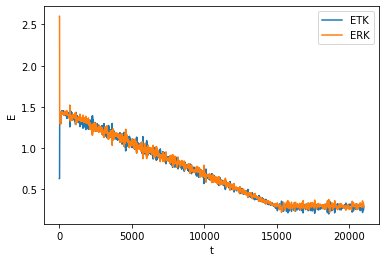

In [82]:
length = -1
plt.plot(ETK[:length],label="ETK")
plt.plot(ERK[:length],label="ERK")
plt.legend()
# plt.xlim(111,113)
plt.xlabel("t")
plt.ylabel("E")

Text(0, 0.5, 'E')

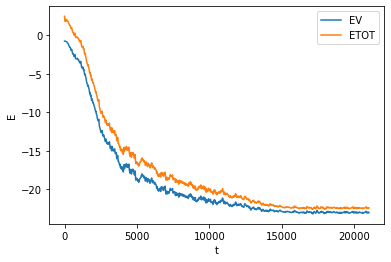

In [83]:
plt.plot(EV[:length],label="EV")
plt.plot(ETOT[:length],label="ETOT")
plt.legend()
plt.xlabel("t")
plt.ylabel("E")

In [85]:
mlab.clf()
t = 20000
MolSize = len(AdamantaneCoords)
MolNum = 27
struSize = MolSize * MolNum
start = t * struSize
end = start + struSize
dcolor = np.array([-0.125,0.125,0])
colors = [[1, 0, 0],[0,1,0],[0,0,1],[1,1,0],[1,0,1],[0,1,1],[1,1,1],[0,0,0]]
for i in range(MolNum):
    points3d(coords[start+i*MolSize:start+(i+1)*MolSize,0], coords[start+i*MolSize:start+(i+1)*MolSize,1], \
        coords[start+i*MolSize:start+(i+1)*MolSize,2], resolution = 16, color = tuple(colors[i%8]), scale_factor=0.2)  
# mlab.show()

In [48]:
mlab.savefig("test1.png")
mlab.savefig("test1.oogl")

In [47]:
histRdf_8 = np.fromfile('Data/Adamantane_8/HistRdf',dtype=np.float64)
histRdf = np.fromfile(DataPath+'/HistRdf',dtype=np.float64)
dr = np.fromfile(DataPath+'/RdfDeltaR',dtype=np.float64)[0]

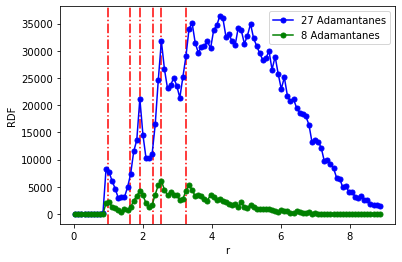

In [54]:
r = [(dr/2+i*dr)/2**(1/6) for i in range(len(histRdf))]
plt.axvline(1,ls='-.',c='r')
plt.axvline(2*np.sqrt(6)/3,ls='-.',c='r')
plt.axvline(4*np.sqrt(3)/3,ls='-.',c='r')
plt.axvline(np.sqrt(11/3),ls='-.',c='r')
plt.axvline(np.sqrt(19/3),ls='-.',c='r')
plt.axvline(4*np.sqrt(6)/3,ls='-.',c='r')
plt.plot(r,histRdf,'bo-',markersize=5,label='27 Adamantanes')
plt.plot(r,histRdf_8,'go-',markersize=5, label='8 Adamantanes')
plt.legend()
plt.xlabel('r')
plt.ylabel('RDF')
plt.savefig("AdamantaneRDF.png",dpi=300)